# Scientific Programming: A Crash Course

## Class 4 – The Scientific Stack – 24 Feb 2022

Today we're going to start doing the *science* part of scientific programming. By the end of this session, I hope you will be able to load a dataset and make some basic plots. To do this, we are going to use three packages that provide lots of functionality well beyond what you can easily achieve in Python alone. These packages are part of what is know as the "scientific stack" (i.e. the stack of packages that are widely used in science). The scientific stack is not strictly defined, but most people would consider the following three packages (at least) to be core members:

- [NumPy](https://numpy.org) - Arrays and numerical computation
- [Pandas](https://pandas.pydata.org) – Data frames
- [Matplotlib](https://matplotlib.org) – Plotting and visualization

However, here are some other packages that could also be considered part of the stack:

- [NetworkX](https://networkx.org) – Graphs and network analysis
- [Numba](http://numba.pydata.org) – Just-in-time compiler (make things faster)
- [PyMC](https://docs.pymc.io) and [Bambi](https://bambinos.github.io/bambi/main/) - Bayesian statistical modelling and MCMC sampling
- [Scikit-Learn](https://scikit-learn.org/stable/index.html) - Machine learning tools
- [Scikit-Optimize](https://scikit-optimize.github.io/stable/) – Black box function optimization
- [SciPy](https://scipy.org) – Linear algebra, optimization, signal processing
- [StatsModels](https://www.statsmodels.org/stable/index.html) – Traditional frequentist stats, including regression models
- [SymPy](https://www.sympy.org/en/index.html) - Mathematics and symbolic computation
- [TensorFlow](https://www.tensorflow.org) and [PyTorch](https://pytorch.org) – Neural networks
- [Xarray](https://docs.xarray.dev/en/stable/) - Efficient high-dimensional array handling

## Installing packages

The ordinary way to install Python packages is to use the `pip` tool. This downloads a package from the [Python Package Index (PyPI)](https://pypi.org) and installs it. It also automatically downloads and installs any other packages that your chosen package depends on – its "dependencies." For example, `package_a` might depend on `package_b`, which depends on `package_c` and `package_d`. Using `pip` to install `package_a` will install all four of the packages. Here are a few useful commands (note, that these need to be used at the terminal, not in the Python interpreter or in a notebook):

- `pip list` – list the packages you have installed
- `pip show package_name` – get info about a particular package you have installed
- `pip install package_name` – install a new package and its dependencies
- `pip uninstall package_name` – uninstall a package (this does *not* remove its dependencies)

However, installing packages can also get a little more complicated depending on how you set things up. If you are using Anaconda, for example, then it's best to use their own tool `conda` to install packages. This works similarly to `pip` but also provides more options to create separate **virtual environments**. A virtual environment is an isolated space in which you install a collection of packages. This allows you to maintain separate environments for separate projects. For example, in one project, you might be using version 1 of `package_x` and in another project you might be using version 2 of `package_x`. By maintaining separate environments, you can avoid potential conflicts. I don't want to go into more detail today about virtual environments, but they are extremely useful, and if you are planning to use Python in the long term, I would highly recommend that you start using them.

Depending on how things are set up on your computer, you may already have the right packages installed. Try running the following line of code to see if `numpy` is already installed:

In [1]:
import numpy

If it fails to import, you will first need to install it. Either by using `conda` (if you are using the Anaconda distribution):

```bash
conda install numpy
```

Or `pip` if you are using a vanilla version of Python:

```bash
pip install numpy
```

Packages can also be managed and installed using Anaconda's GUI interface, although I haven't used this myself, so I'm not exactly sure how it works. Check out this link for more help: https://docs.anaconda.com/anaconda/navigator/getting-started/#navigator-managing-packages

Check that you also have Pandas and Matplotlib installed too – we'll also be using those today.

## NumPy

NumPy (officially pronounced /nʌmpaɪ/ although many people call it /nʌmpi/) is *the* most fundamental package in the scientific stack. Whenever I need to do something mathy or sciency, NumPy is always the very first thing I import, so let's go ahead and do that right now:

In [2]:
import numpy as np

Note that I am importing `numpy` as `np` here. This means I am importing the package but giving it a different, shorter name, so that I don't have to keep typing `numpy` all the time. This convention of importing `numpy` as `np` is very common, so it's good to get into the habit.

### Arrays

Right, so what is NumPy anyway? NumPy provides support for array-based numerical computation, something that is not directly available in the core Python language. The closest thing in base-Python is the `list` data type, but NumPy arrays extend the `list` concept much further. If you are coming from the Matlab world, you should find NumPy arrays very familiar. There are also a lot of similarities with vectors in R.

Let's make a NumPy array:

In [3]:
my_array = np.array( [1, 2, 3, 4, 5] )
print(my_array)

[1 2 3 4 5]


As you can see, an array basically looks like a list. In fact, to create this array I literally made a list first (recall that square brackets are used to make lists) and then I passed this list into the `np.array()` function to convert it into an array.

So, what can I do with this array? Well, first, look what happens if I perform some basic mathematical operations with the array:

In [4]:
print(my_array + 10)

[11 12 13 14 15]


In [5]:
print(my_array * 10)

[10 20 30 40 50]


In [6]:
print(my_array / 10)

[0.1 0.2 0.3 0.4 0.5]


In [7]:
print(my_array - 10)

[-9 -8 -7 -6 -5]


As you can see, when you perform some mathematical operation with a scalar (a single number), that operation is applied to all the numbers in the array simultaneously. If you wanted to achieve the same effect with base-Python, you'd have to do something a bit more awkward, perhaps involving a list comprehension like this:

In [8]:
my_list = [1, 2, 3, 4, 5]
print([x*10 for x in my_list])

[10, 20, 30, 40, 50]


You can also perform mathematical operations with two (or more) arrays, like this:

In [14]:
array1 = np.array([1, 2, 3, 4, 5])
array2 = np.array([1, 10, 100, 1000, 1000])

print(array1 * array2)

[   1   20  300 4000 5000]


Do you see what happened? Each number in `array1` was multiplied by the corresponding number in `array2`. This is called **elementwise multiplication**. As you would expect, you can also do elementwise addition, subtraction, division, and exponentiation. The key thing to remember is that the arrays need to have the same length so that they can be ["broadcast"](https://www.tutorialspoint.com/numpy/numpy_broadcasting.htm) together. Try writing some more examples below:

In [17]:
array1 = np.array([1, 2, 3, 4, 5])
array2 = np.array([1, 10, 10, 10, 10])

print(array1 ** array2)
print(array1)
print(array2)

#BEAWARE OF THE OVERFLOW

[      1    1024   59049 1048576 9765625]
[1 2 3 4 5]
[ 1 10 10 10 10]


Arrays can have more than one dimension. Here's a two-dimensional array:

In [18]:
array_2d = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

print(array_2d * 10)

[[10 20 30]
 [40 50 60]
 [70 80 90]]


You don't need to create the array with indentation, as I have done here – I just did that to make the code more readable. A 2D array is like a list of lists, where the inner lists are all of the same length.

Now let's multiply a 2D array and 1D array:

In [19]:
array_1d = np.array([10, 100, 1000])

array_2d = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

print(array_1d * array_2d)

[[  10  200 3000]
 [  40  500 6000]
 [  70  800 9000]]


In [22]:
array_1d = np.array([[10], [100], [1000]])

array_2d = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

print(array_1d * array_2d)

[[  10   20   30]
 [ 400  500  600]
 [7000 8000 9000]]


Do you see what happened? The elementwise multiplication is applied to each row. How would you do the same to each column – elementwise multiplication across the columns (hint: it's not very obvious, but you need a column array).

Arrays have several attributes that are sometimes useful to access:

In [23]:
print(array_2d.ndim) # Number of dimensions
print(array_2d.shape) # Shape of the dimensions (n rows, n columns)
print(array_2d.size) # Total number of elements / cells
print(array_2d.dtype) # Data type of the array

2
(3, 3)
9
int64


So, in this case, `array_2d` is a two-dimensional array with a 3×3 shape, and it contains nine 64-bit integers. One important thing to note about arrays is that all the elements need to be of the same data type; unlike regular Python lists, you cannot mix different types together. In this case, for example, all the values are integers. This allows NumPy to store and process the numbers very efficiently, which can be important in computationally intensive applications.

Unlike regular Python, NumPy gives you much more flexibility over the data type. For example, if you needed to, you could create an array that uses 8-bit integers:

In [25]:
array = np.array([1, 2, 3, 4, 5, 1000], dtype=np.int8)
print(array)

[  1   2   3   4   5 -24]


8-bit integers allow you to represent $2^8 = 256$ different values, specifically, the numbers -128 through +127. (Try putting some larger values in the array above; what happens? Do you understand why? This is called overflow.) In many cases, 8-bit integers will be very limiting – usually we need to represent a much larger range of numbers. However, if you are doing some kind of computation where you only need small numbers, using 8-bit integers can be beneficial because they use less memory compared to the default 64-bit integers. Base-Python doesn't give you this level of control, but NumPy does.

One example of where 8-bit integers are frequently used is in storing RGB (red, green, blue) color data – for example, each pixel in an image is stored as an RGB value. By using 8-bit integers, we can represent 256 shades of red, 256 shades of green, and 256 shades of blue. This means that $256^3 = 16$ million colors can be represented, with each pixel requiring just $8 \times 3 = 24$ bits of data. If we were using 64-bit integers, each pixel would require $64 \times 3 = 192$ bits, even if we limited ourselves to making the same 16 million color distinctions.

In general, however, you don't need to worry about more exotic data types like 8-bit integers – the default ints and floats will be fine.

### Array creation

Rather than manually creating arrays by passing in a list, as we have been doing so far, there is often a function for creating the particular kind of array you need. For example, if you need an array of consecutive numbers, you can use `np.arange()` (note that this is array-range, the NumPy equivalent of `range()`, not the word *arrange* – for years I misread this function name as *arrange*!):

In [26]:
nums = np.arange(0, 10)
print(nums)

[0 1 2 3 4 5 6 7 8 9]


Just like (almost) everything else in Python, ranges are inclusive:exclusive in NumPy. Which reminds me! NumPy has its own set of random functions within the `numpy.random` module. To create an array of 100 random ints, we can do this:

In [27]:
rand_nums = np.random.randint(0, 10, 100)
print(rand_nums)

[4 8 9 6 7 7 9 1 6 8 5 3 1 8 1 4 2 1 5 9 0 0 2 1 0 8 3 7 2 9 5 2 9 8 9 0 2
 9 0 4 8 2 7 5 1 7 6 9 6 3 8 0 9 0 6 6 5 3 0 6 8 9 3 0 2 1 4 8 8 1 7 5 4 1
 9 8 4 1 3 5 4 6 3 0 8 9 7 1 1 2 0 7 1 0 7 7 6 1 1 0]


Notice how this is different from Python's built-in `random.randint()`, which is weirdly inclusive:inclusive. The NumPy version of the `randint()` function is sensible; all the random integers generated here will be less than 10.

Another common type of array you will need is an array of zeros:

In [28]:
zeros_array = np.zeros( (4, 3) )
print(zeros_array)
print(zeros_array.dtype)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
float64


When you use the `np.zeros()` function to create an array, you have to specify the desired shape; here, I asked for an array of zeros with the shape 4×3. Since I didn't specify a data type, it defaulted to 64-bit floats. Another quick thing to note here: NumPy is [row-major rather than column-major](https://en.wikipedia.org/wiki/Row-_and_column-major_order). This means that the rows are considered to be the first dimension and the columns are the second dimension. Hence, when I asked for a 4×3 array, I got an array with four rows and three columns. The opposite is the case in other scientific programming languages, including Julia, Matlab, and R.

You might be wondering why you would ever want an array of zeros. Typically this is useful if you need to do some kind of counting and you need to initialize the counts at zero. For example, imagine you wanted to construct a simple neural network and you needed to initialize the weights to zero.

There is also `np.ones()` for creating an array of ones, and `np.full()` for creating an array filled with a particular arbitrary number. Try using them below:

In [34]:
np.full((3,4), [8,1,2,3])

array([[8, 1, 2, 3],
       [8, 1, 2, 3],
       [8, 1, 2, 3]])

In [40]:
np.full((3,4), [8,1,2,3], order='F')

array([[8, 1, 2, 3],
       [8, 1, 2, 3],
       [8, 1, 2, 3]])

Another very common kind of array you will want to create is a linearly-spaced sequence or "linspace":

In [42]:
seq = np.linspace(0, 1, 21)
print(seq)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


So, here, I am creating an array of `21` evenly spaced numbers from `0` to `1`. This is often useful for generating the *x*-values of a graph, and we'll use it for this purpose later.

### Array indexing

Indexing an array is very similar to indexing a Python list. To demonstrate, I will  first create an array of the numbers 1–9 reshaped into a 3×3 2D array:

In [43]:
box_of_nine = np.arange(1, 10).reshape((3, 3))
print(box_of_nine)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


Indexing is done using square brackets, just like with regular Python lists, except now you can also index into multiple dimensions by separating each dimension with a comma. For example, say I wanted to access the value on the first row (index 0 – remember, counting is from zero) and the second column (index 1):

In [44]:
print(box_of_nine[0, 1])

2


You can think of the indices like coordinates. Just remember: since NumPy is row-major, the row index is always specified first. Check that you can access all nine numbers by specifying the appropriate row and column indices.

NumPy also permits slices, just like regular Python indexing, except the slicing is... you guessed it!... generalized to multiple dimensions. For example, say I wanted to extract the first two rows and all three columns:

In [45]:
print(box_of_nine[0:2, 0:3])

[[1 2 3]
 [4 5 6]]


This can be read as: extract row 0 up-to-but-not-including row 2, and column 0 up-to-but-not-including column 3. Play around with the slices to check you understand. Note also that if you leave one side of the slice blank, the start or end of the dimension is implied. For example, here I extract the middle column (all rows, column 1):

In [46]:
print(box_of_nine[:, 1])

[2 5 8]


Like Python lists, arrays are mutable. This means they can be updated with new values. Let's change the middle number to a zero:

In [47]:
box_of_nine[1, 1] = 0
print(box_of_nine)

[[1 2 3]
 [4 0 6]
 [7 8 9]]


You can also modify an entire row or column with a single line of code. Here I will change the middle column to a five:

In [48]:
box_of_nine[:, 1] = 5
print(box_of_nine)

[[1 5 3]
 [4 5 6]
 [7 5 9]]


And now I will increment the middle row by one:

In [49]:
box_of_nine[1, :] += 1
print(box_of_nine)

[[1 5 3]
 [5 6 7]
 [7 5 9]]


### NumPy functions

NumPy includes lots of common mathematical functions that are designed to work with arrays. For example, you can use `np.sum()` to sum an array:

In [50]:
box_of_nine = np.arange(1, 10).reshape((3, 3))

print(box_of_nine)
print( np.sum(box_of_nine) )

[[1 2 3]
 [4 5 6]
 [7 8 9]]
45


`np.sum()` is an example of an aggregator function – a function that reduces a set of values down to a single value. Other examples would be `np.min()`, `np.max()`, and `np.mean()`. These allow you to apply the function along particular dimensions (or axes, as they are referred to). For example, we can sum along the 0th axis (i.e. the rows):

In [51]:
print( np.sum(box_of_nine, axis=0) )

[12 15 18]


or we can sum along the 1st axis (i.e. the columns):

In [52]:
print( np.sum(box_of_nine, axis=1) )

[ 6 15 24]


Try this out with other aggregator functions such as `np.min()` and `np.max()`. Make sure you try to predict what the result will be before running the code:

In [57]:
np.mean(box_of_nine, axis=0)

array([4., 5., 6.])

In [58]:
np.min(box_of_nine, axis=0)

array([1, 2, 3])

NumPy contains functions for all the common mathematical operations, including:

- `np.abs()` – absolute value
- `np.argmax()` – argmax
- `np.argmin()` – argmin
- `np.cos()` – cosine
- `np.dot()` – dot product
- `np.log()` – natural logarithm
- `np.log10()` – base-10 logarithm
- `np.log2()` – base-2 logarithm
- `np.mean()` – mean
- `np.median()` – median
- `np.prod()` – product
- `np.sin()` – sine
- `np.sqrt()` – square root
- `np.std()` – standard deviation
- `np.tan()` – tangent
- `np.var()` – variance

and much much more... Many of these functions are also implemented as array methods as well, which are sometimes more convenient to use.

Lastly, although I only showed examples of 1D and 2D arrays above, everything we've covered generalizes to *n* dimensions! If you're curious, go back through some of the examples and try playing with higher-dimensional arrays.

If you want to learn more about NumPy, check out the user guide: https://numpy.org/doc/stable/user/ The two main reasons why you would want to use NumPy are (1) if you are doing something computationally intensive where efficiency matters (e.g. imaging data or neural nets), and (2) if you are doing something mathy that involves manipulation of vectors and matrices.

## Pandas

We briefly encountered Pandas in the last class when we were loading CSV files. Pandas is a package for representing data frames – a concept that will be very familiar to you if you are coming from the R world.

What is a data frame? A data frame is essentially a table or spreadsheet. It shares some similarities with 2D arrays, like those we've just been working with above; however, data frames are geared towards data analysis rather than numerical computations. Unlike arrays, data frames have headers, and different data types (ints, strings, Booleans) can be freely mixed together.

Let's create a data frame from the `example_data.csv` that we used in the last class.

In [59]:
import pandas as pd

df = pd.read_csv('example_data.csv')

First, similar to NumPy, the conventional way to import Pandas is `as pd`. Again, this is so that we don't have to keep typing `pandas` all the time. I then used the `pd.read_csv()` function to load the CSV file into a data frame. Let's have a look at it:

In [60]:
df

,subject,test_type,category_system,correct
0,1,production,size,1
1,1,production,size,1
2,1,production,size,1
3,1,production,size,1
4,1,production,size,1
...,...,...,...,...
15355,240,comprehension,size,0
15356,240,comprehension,size,1
15357,240,comprehension,size,1
15358,240,comprehension,size,0


As you can see, this gives us a nice overall summary of the dataset. There are four columns and 15,360 rows. There is also an extra "column" on the left which numbers the rows from 0 to 15359, and an extra "row" at the top which labels the columns – but these are not true rows and columns, just headers that describe the main content of the data frame. Notice also that we only see the first five rows and the last five rows. If we printed the whole data frame it would be massive. Looking at just the first and last rows is often pretty informative. For example, here we can see that there appear to be 240 subjects.

The principle of "tidy data" that I mentioned in the last class says that each column should represent a "variable" (not in the coding sense, but in the statistical sense), and that each row should represent an observation. It is reasonable to assume, then, that each of the rows here represents a single trial, and that the participant was either correct or incorrect on each trial (represented as `0` or `1`). We also get the sense that there are some different conditions – different test types and category systems. Let's find out what values are present in these two columns:

In [61]:
print( df['test_type'].unique() )
print( df['category_system'].unique() )

['production' 'comprehension']
['size' 'angle' 'both']


Here, the brackets allow us to index each of the columns (first the `test_type` column and then the `category_system` column), and then calling the `.unique()` method show us the unique values that exist in those columns. So, now we can see that this experiment appears to have a 2×3 design – there are two test types and three category systems. Another question we might have is, is this a between-subject or within-subject design? To answer that, we could isolate the data for just one of the participants:

In [62]:
df.query('subject==1')

,subject,test_type,category_system,correct
0,1,production,size,1
1,1,production,size,1
2,1,production,size,1
3,1,production,size,1
4,1,production,size,1
...,...,...,...,...
59,1,production,size,1
60,1,production,size,1
61,1,production,size,1
62,1,production,size,1


Note that this effectively creates a new data frame with only the data from subject 1 (technically, I don't think this creates a new data frame completely; rather, we get a "view" into a portion of the original data frame). Based on this, it looks like the experiment is fully between-subject: An individual subject does one of the two test types (this participant did `production`) and one of the three category systems (this participant did `size`). We also see here that the participant did 64 trials.

One quick thing to note about the syntax here. `'subject==1'` is a string. This looks a bit awkward, but imagine you instead wrote `subject == 1` (the variable `subject` is `1`) or `'subject' == 1` (the string `'subject'` is 1). These conditions would evaluate as `False` and the query would not be interpretable. When you use the `.query()` method, you express the query as a string and Pandas then parses and interprets that string as some conditional statement pertaining to the data frame. This is different from R, which seems to magically figure out whether something is a variable or a data frame header (I never understood how this works – if someone could enlighten me, I would be grateful!).

The next thing we might wonder is how accurate this participant was. First, let's assign the participant's subset of the data frame to a variable for convenient access:

In [63]:
subject1 = df.query('subject==1')

and then we can simply sum the `correct` column to see how many of the trials (out of 64) were correct (the sum of all the zeros and ones effectively just counts the number of ones):

In [65]:
subject1['correct'].sum()

55

Let's express that as a proportion instead:

In [66]:
subject1['correct'].sum() / 64

0.859375

An alternative way to get this answer would be to take the mean of the column. Taking the mean of a bunch of zeros and ones is mathematically equivalent to calculating the proportion of trials that were correct:

In [67]:
subject1['correct'].mean()

0.859375

In [68]:
df.query('subject==1')['correct'].mean()

0.859375

Great, so this participant is 86% accurate. Is that good or bad? To answer this we need to look at their performance against all the other participants. It will be easier to do that with some visualizations, so, at this point, we should turn out attention to Matplotlib.

But before we move on, if you want to learn more about Pandas, a good place to start is the user guide: https://pandas.pydata.org/docs/user_guide/ There's also a very handy cheat sheet here: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf If you're like me and you can't remember any of the commands, print out the cheat sheet and stick it on the wall behind your computer screen.

## Matplotlib

Matplotlib is the most widely-used plotting library in Python. If you're coming from the R world, it is roughly equivalent to ggplot. Matplotlib allows you to create all sorts of plots: the obvious ones, like bar plots, scatter plots, and line plots, but also the less obvious ones like violin plots, heatmaps, and timelines.

Let's jump right in and import Matplotlib:

In [70]:
import matplotlib.pyplot as plt

Like NumPy and Pandas, this is the conventional way that Matplotlib is imported. Matplotlib includes other modules for dealing with lower-level stuff like shapes and text, but 95% of the time we just need the `pyplot` module, so the convention is to import just that module and call it `plt`.

Before we start plotting the data from the previous section, let's look first at some more basic examples to get the general idea. First, let's start with a simple line plot. This type of plot is so basic, Matplotlib literally just calls the relevant function `plot()`:

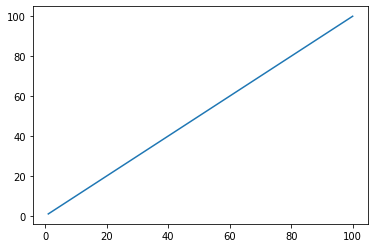

In [71]:
x = np.arange(1, 101)
y = np.arange(1, 101)

plt.plot(x, y)

Here I created two sets of values, `x` and `y`, both of which are just the numbers one through one hundred. I then plotted `x` against `y`. To make this fake data look a little more interesting, let's add some random noise to the `y` values:

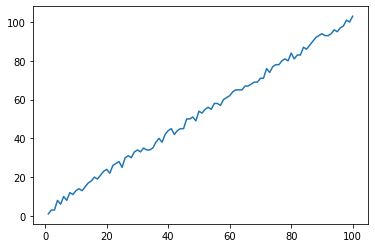

In [72]:
x = np.arange(1, 101)
y = np.arange(1, 101)
y += np.random.randint(0, 5, 100)

_ = plt.plot(x, y)

(Note here that, on the last line, I assigned the output of the plot to the dummy variable `_`. Normally you don't need to do this, but I'm doing it here because otherwise Jupyter Notebook will print lots of junky output that we don't need to see, like `[<matplotlib.lines.Line2D at 0x151a3dba0>]`. Look back at the previous plot to see what I mean. Assigning the output of the plotting function to a variable just gets it out of the way so that we have a cleaner notebook.)

If you're a little unsure what's happening here in terms of the data generation, try taking it step by step (what do `x` and `y` look like, how are we generating and adding the noise?)

To make this plot a little more informative, we should add some *x*- and *y*-axis labels:

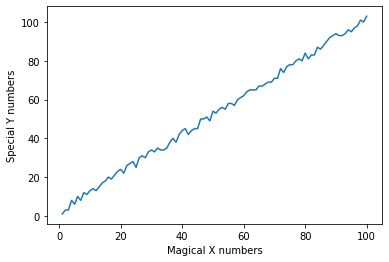

In [73]:
plt.xlabel('Magical X numbers')
plt.ylabel('Special Y numbers')
_ = plt.plot(x, y)

And... that shade of blue is pretty boring...

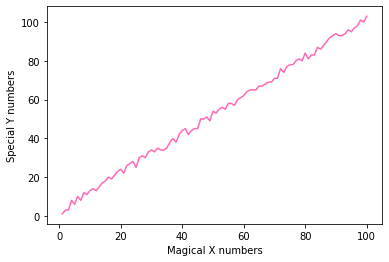

In [74]:
plt.xlabel('Magical X numbers')
plt.ylabel('Special Y numbers')
_ = plt.plot(x, y, color='hotpink')

Another way we might want to plot this data is with a scatter plot. A scatter plot is kinda like a line plot, except the points are not joined together with lines. This usually makes sense when the points are not intrinsically ordered.

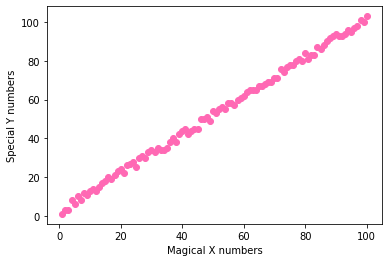

In [75]:
plt.xlabel('Magical X numbers')
plt.ylabel('Special Y numbers')
_ = plt.scatter(x, y, color='hotpink')

Let's make another scatter plot that looks a bit more realistic – we'll make the noise normally distributed. To do that, we'll use the `np.random.normal()` function:

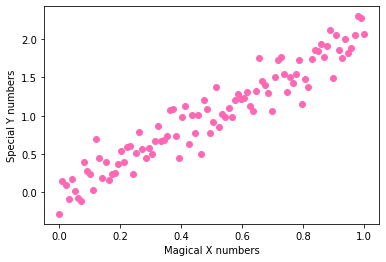

In [76]:
x = np.linspace(0, 1, 100)
y = x * 2 + np.random.normal(0, 0.2, 100)

plt.xlabel('Magical X numbers')
plt.ylabel('Special Y numbers')
_ = plt.scatter(x, y, color='hotpink')

Finally, let's overlay a simple linear regression line on this plot. To do this, we'll use NumPy's `polyfit()` function to determine the best fitting regression line (represented as an intercept and slope) and then we'll draw that line on the plot:

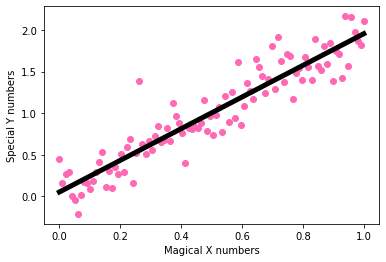

In [77]:
x = np.linspace(0, 1, 100)
y = x * 2 + np.random.normal(0, 0.2, 100)

β, α = np.polyfit(x, y, 1) # fit regression line - slope and intercept
y_predicted = α + β * x # y-values predicted by the regression line

plt.xlabel('Magical X numbers')
plt.ylabel('Special Y numbers')
plt.scatter(x, y, color='hotpink')
_ = plt.plot(x, y_predicted, color='black', linewidth=5)

Try playing around with the colors and styles. Need some color inspiration? [Check this page for all the standard color names you can use.](https://www.w3schools.com/cssref/css_colors.asp) Can you change the circular points into squares or triangles? Do some research to find out how it's done.

A great place to start whenever you have some new data is to plot a histogram to get an overall sense of the distribution of the data points. So it's worth taking a quick moment to see how it's done in Matplotlib. As you'll see, it's super easy, so you have no excuses for not plotting histograms of your data! First, I'll generate 1000 random numbers that are normally distributed with a mean of 0 and a standard deviation of 1, and then I'll use `plt.hist()` to make the plot:

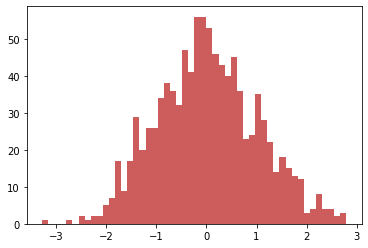

In [79]:
values = np.random.normal(0, 1, 1000)

_ = plt.hist(values, color='indianred', bins=50)

The `bins` argument allows you to control how many "bins" the datapoints are categorized into, which can give you a more granular view.

Okay, now that we've played around with some a fake data, I hope you've got the general idea of how things work. Basically, you pass your data into one of the plotting functions – like `plt.plot()`, `plt.scatter()`, or `plt.hist()` – and you set some colors and labels, and hey presto, you have a plot! Of course, there are **a lot** more options for further customization. To see lots more example plots, and the code used to generate them, check the Matplotlib gallery here: https://matplotlib.org/stable/gallery/index

Let's go back to the dataset from the previous section and try making some plots of real data. First, I just want to look at the results from the production test type, so let's isolate those trials first into a new data frame which we'll assign to the variable `production_df`:

In [80]:
production_df = df.query('test_type=="production"')
production_df

,subject,test_type,category_system,correct
0,1,production,size,1
1,1,production,size,1
2,1,production,size,1
3,1,production,size,1
4,1,production,size,1
...,...,...,...,...
7675,120,production,size,0
7676,120,production,size,1
7677,120,production,size,1
7678,120,production,size,1


Next, I want to calculate accuracy for each of the category systems; to do this, we'll use the data frame's `.groupby()` method to group the data by category system and then calculate the mean of the `correct` column for each group:

In [81]:
accuracy_by_condition = production_df.groupby('category_system')['correct'].mean()
accuracy_by_condition

category_system
angle    0.921094
both     0.555078
size     0.713281
Name: correct, dtype: float64

Right away we see that accuracy is highest in the `angle` condition and lowest in the `both` condition. Let's make a bar plot:

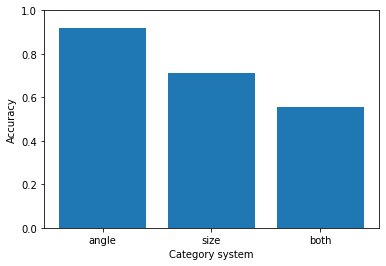

In [82]:
# sort in descending order
accuracy_by_condition = accuracy_by_condition.sort_values(ascending=False)

plt.ylim(0, 1) # make the y-axis go from 0 to 1
plt.xlabel('Category system')
plt.ylabel('Accuracy')
_ = plt.bar(accuracy_by_condition.index, accuracy_by_condition)

As everyone knows, bar plots are terrible! You should probably never use them. Let's do better by making a violin plot, which will show us not only the central tendency of the three conditions, but also their distributions. To make a violin plot, we need to organize the data a little bit so that we have subject-level accuracy scores for each of the category systems. To do that I will further subset the `production_df` into a separate data frame for each system, and then I'll compute subject-level accuracy using `.groupby()`.

In [92]:
angl_df = production_df.query('category_system=="angle"')
size_df = production_df.query('category_system=="size"')
both_df = production_df.query('category_system=="both"')

angl_accuracy_by_subject = angl_df.groupby('subject')['correct'].mean()
size_accuracy_by_subject = size_df.groupby('subject')['correct'].mean()
both_accuracy_by_subject = both_df.groupby('subject')['correct'].mean()

data = [angl_accuracy_by_subject, size_accuracy_by_subject, both_accuracy_by_subject]
type(data[0])

pandas.core.series.Series

Print out the varibles if you're unsure what's happening. Finally, let's make the violin plot:

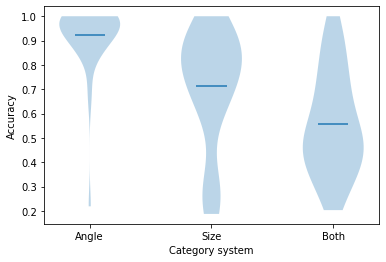

In [98]:
#plt.ylim(0, 1) # make the y-axis go from 0 to 1
plt.violinplot(data, showmeans=True, showextrema=False)
plt.xlabel('Category system')
plt.ylabel('Accuracy')
_ = plt.xticks([1, 2, 3], labels=['Angle', 'Size', 'Both'])

Great! Now we can get a sense of how much variation there is across participants within each condition. This is much more informative than just looking at the means (shown here with the dark blue lines).

If you still have time... make a violin plot of the comprehension test data, which we ignored earlier on by extracting only the production test.

Matplotlib is quite old and crusty, and it can sometimes be hard to achieve exactly the look you want. For a more modern plotting package, I'd also recommend checking out [Seaborn](https://seaborn.pydata.org). Seaborn builds on top of Matplotlib, but it's generally a bit cleaner and easier to use.

In [99]:
comp_df = df.query('test_type=="comprehension"')
comp_df

,subject,test_type,category_system,correct
7680,121,comprehension,angle,1
7681,121,comprehension,angle,1
7682,121,comprehension,angle,1
7683,121,comprehension,angle,1
7684,121,comprehension,angle,0
...,...,...,...,...
15355,240,comprehension,size,0
15356,240,comprehension,size,1
15357,240,comprehension,size,1
15358,240,comprehension,size,0


In [103]:
angl_accuracy_by_subject_comp = comp_df.query('category_system=="angle"').groupby('subject')['correct'].mean()
size_accuracy_by_subject_comp = comp_df.query('category_system=="size"').groupby('subject')['correct'].mean()
both_accuracy_by_subject_comp = comp_df.query('category_system=="both"').groupby('subject')['correct'].mean()

data_comp = [angl_accuracy_by_subject_comp, size_accuracy_by_subject_comp, both_accuracy_by_subject_comp]

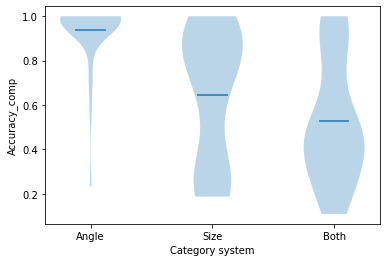

In [104]:
plt.violinplot(data_comp, showmeans=True, showextrema=False)
plt.xlabel('Category system')
plt.ylabel('Accuracy_comp')
_ = plt.xticks([1, 2, 3], labels=['Angle', 'Size', 'Both'])

##  Arrivederci to Notebooks!

This is the last class in which we'll use Jupyter Notebook. Does that make you feel happy or sad? Do you like the notebook format? Have you had any issues with it? Have you used something like this before in another language?

Personally, I don't *love* notebooks, although I understand why many people do. The really nice thing is that you can mix text and code together. This makes notebooks very useful in an educational context – like this class – because we can mix code with explanations. Notebooks can also be useful in a scientific context because they allow you to clearly document your thought processes as you explore some data.

However, in my experience, the notebook style of coding tends to get a bit messy and confusing, mostly because it's difficult to keep track of the current "state" of the underlying interpreter. For example, let's say we run the following code block:

In [105]:
my_special_number = 7

Then, maybe we do some calculations with this variable:

In [108]:
answer = my_special_number ** 2 + 100
print(answer)

200


Okay, great! The answer is 149. Now I run some more code:

In [107]:
magical_constant = 64
my_special_number = 10
answer = magical_constant * my_special_number
print(answer)

640


Okay, 640, sure. Now go back to the previous code block and run it again – the one where we got the answer 149. Did you get the same answer? You should get 200 instead – it no longer gives you 149. Why? Because in the subsequent code block you redefined `my_special_number` to `10`, perhaps without even realizing.

It's very easy to get into confusing situations like this because code blocks can be run in any order. If you lose track of what order you ran things in, you can quickly get in a pickle! Notebooks go against the top-to-bottom sequential flow that we normally expect when programming. Instead, the sequential flow – the order in which the lines of code are run – exists only in your head and remains undocumented. I don't want to totally dissuade you from using notebooks (there are many good reasons to use them), but it's worth thinking about these issues if you plan to use them in the future.

If you want to think more about these problems, check out this video titled "I Don't Like Notebooks": https://www.youtube.com/watch?v=7jiPeIFXb6U (warning: the guy talks really fast – turn down the playback speed if you can't understand him!) I tend to agree with many of his points. What do you think?

## Homework

Take a dataset that you're currently working on, and try to use some the tools we've learned today. Or if you don't have your own dataset, look around online for something that interests you (e.g. climate change, covid numbers, or sports statistics). Can you import the data as a Pandas data frame? Practice extracting different rows and columns. Can you make some pretty plots?